In [175]:
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
# Sorting packages
from collections import Counter
from operator import itemgetter
# Imports for data processing
np.set_printoptions(threshold=np.nan)



In [176]:
def read_datafile(file_name):
    # the skiprows keyword is for heading, but I don't know if trailing lines
    # can be specifie
    data = np.genfromtxt(fname=file_name,
                         usecols=np.arange(1,36), #Temp to protect from some cols having 37 values. 
                                                  #We also don't need 1st col (Or 6th)
                         delimiter=",",
                         skip_header=1,
                         missing_values={0:'',1:'TRUE',0:'FALSE'}, # set all values of empty to be 0,
                                                                   # values of true to be 1, and value of false to be 0
                         )
    
    np.nan_to_num(data,False) # Nan is 0, despite the defination of Nan
    
    return data

VernonGP = read_datafile('Mt_Vernon_Scouting.csv')
#Don't know how to handle if that data is not *exactly* where it needs to be
#In the form of a ndarray array


Few important notes:
    - To retreve any given data entry
        - In the form of [entry][datapoint]
        - Where entry is the horizontal row, datapoint is the distance down that given 'entry'
    - Strings still throw errors, strings turn into NaN, which is ATM fine, because each team number is just an int
    - The current data range is (445, 35)
    - [data].shape = tuple of dimensions ^^
    - Temp Data assignments untill a more standard system is put into place
        - 18 = # cubes into exchange
        - 16 = # cubes in opponent switch
        - 15 = # cubes on our switch
        - 19 = # cubes in scale


In [177]:
# WIP
teamData = {}

# TODO: Prevent overflow (This can overflow, right now I am cheating by emptying the list before the method)
def sum_team_data(data):
    cells2read = [18,16,15,19] #TODO: Make this an argument to the method
    
    # Perform this task for every entry
    #for numentry in range(0,data.shape[0]):
    for entry in data:
        team = str(entry[1])
        if team in teamData:
            for cell in cells2read:
                if cell == 19:
                    teamData[team]['cubescale'] += entry[cell]
                elif cell == 18:
                    teamData[team]['cubeexc'] += entry[cell]
                elif cell == 16:
                    teamData[team]['cubeoppswitch'] += entry[cell]
                elif cell == 15:
                    teamData[team]['cubeallyswitch'] += entry[cell]
        else:
            teamData[team] = {'cubescale':0, 'cubeexc':0, 'cubeoppswitch':0, 'cubeallyswitch':0}
            # Create a standard entry in the 2D dictonary
                
                
            
       
                
sum_team_data(VernonGP)
#for key in teamData:
#    print(key)

    Current plan to convert data into a table:
        - cells2read = [18,16,15,19]
        - For entry in data:
            if str(team#) in dict:
                for cell in cells2read:
                    if cell == 18:
                        dict['strteam#']['cubeexc'] += entry[cell]
                    elif cell == 16:
                        dict['strteam#']['cubeoppswitch'] += entry[cell]
                    elif cell == 15:
                        dict['strteam#']['cubeallyswitch'] += entry[cell]
                    elif cell == 19:
                        dict['strteam#']['cubescale'] += entry[cell]
                    
            

In [181]:
# Creates a bar graph from a dictionary data
# sorted(foo, key=foo.get)
WIDTH = 0.35

def bar_data(dict_data, data):
    # Programmed to sort by largest 1sts
    x = []
    height = []
    tick_label = []
    
    team2data = {}
    
    for key in dict_data:
        tick_label.append(key)
        
        height.append(dict_data[key][data])
       
        # MAGIC --> print(dict_data[key])
    
    ind = np.arange(len(tick_label))
    
    return plt.bar(ind, height, WIDTH)

In [182]:
#TODO: Make more universal
#Creates a list of all team #'s
def list_teams(dict_data):
    keys = []
    for key in dict_data:
        key = key[:-2] # Clip the .0 from all the team numbers for A S T H E T I C
        keys.append(key)
    
    print(keys)
    return keys


{'cubescale': 3.0, 'cubeexc': 4.0, 'cubeoppswitch': 20.0, 'cubeallyswitch': 9.0}
{'cubescale': 32.0, 'cubeexc': 3.0, 'cubeoppswitch': 8.0, 'cubeallyswitch': 4.0}
{'cubescale': 0.0, 'cubeexc': 14.0, 'cubeoppswitch': 0.0, 'cubeallyswitch': 3.0}
{'cubescale': 26.0, 'cubeexc': 6.0, 'cubeoppswitch': 6.0, 'cubeallyswitch': 10.0}
{'cubescale': 0.0, 'cubeexc': 14.0, 'cubeoppswitch': 0.0, 'cubeallyswitch': 4.0}
{'cubescale': 0.0, 'cubeexc': 0.0, 'cubeoppswitch': 0.0, 'cubeallyswitch': 0.0}
{'cubescale': 28.0, 'cubeexc': 3.0, 'cubeoppswitch': 3.0, 'cubeallyswitch': 4.0}
{'cubescale': 0.0, 'cubeexc': 20.0, 'cubeoppswitch': 0.0, 'cubeallyswitch': 6.0}
{'cubescale': 0, 'cubeexc': 0, 'cubeoppswitch': 0, 'cubeallyswitch': 0}
{'cubescale': 0.0, 'cubeexc': 5.0, 'cubeoppswitch': 1.0, 'cubeallyswitch': 17.0}
{'cubescale': 1.0, 'cubeexc': 9.0, 'cubeoppswitch': 0.0, 'cubeallyswitch': 4.0}
{'cubescale': 36.0, 'cubeexc': 7.0, 'cubeoppswitch': 14.0, 'cubeallyswitch': 3.0}
{'cubescale': 12.0, 'cubeexc': 30.0, 

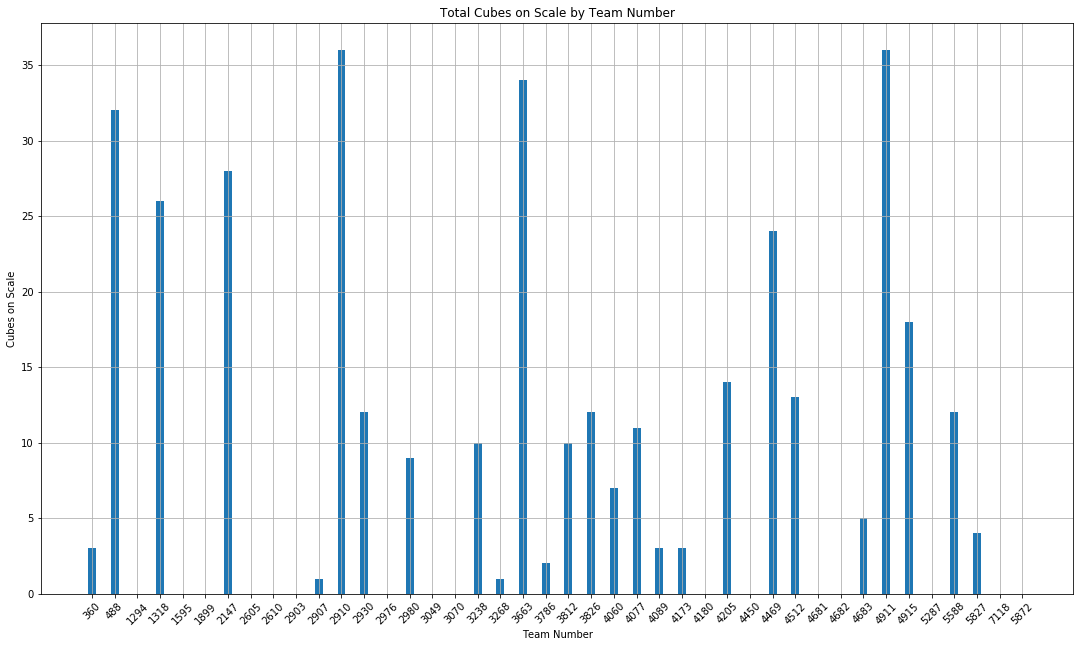

In [183]:
# Set figure sie
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

# Create bar plot
p1 = bar_data(teamData, 'cubescale')

# Labels
plt.ylabel('Cubes on Scale')
plt.xlabel('Team Number')
plt.title('Total Cubes on Scale by Team Number')

# Config for X-Ticks
x_tick = list_teams(teamData)
plt.xticks(np.arange(len(x_tick)), x_tick)
plt.xticks(rotation=45)

# Grid
plt.grid(True)

# Readable .png
plt.savefig('TestUno.png', dpi=400)


(445, 35)
